In [15]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

exercise = pd.read_csv("exercise.csv")

In [16]:
df = pd.DataFrame(exercise,columns=['y','x1','x2'])

#data without nan values
data = df[:40]

#data with nan
nan_data = df[40:60]


In [17]:
X = data[['x1','x2']]
Y = data['y']
X = sm.add_constant(X) # adding a constant
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
    
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     652.4
Date:                Mon, 09 Dec 2019   Prob (F-statistic):           1.41e-29
Time:                        22:48:57   Log-Likelihood:                -50.985
No. Observations:                  40   AIC:                             108.0
Df Residuals:                      37   BIC:                             113.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3151      0.388      3.392      0.0

D:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



In [18]:
const_coef = 1.3151
x1_coef = 0.5148
x2_coef = 0.8069

# We know X1 and X2 and want to predict Y
X1 = nan_data['x1']
X2 = nan_data['x2']

for row in nan_data:
    predicted_y = (const_coef) + (x1_coef)*X1 + (x2_coef)*X2

print(predicted_y)

40    14.812143
41    19.142420
42     5.916687
43    10.530219
44    19.012042
45    13.398546
46     4.829030
47     9.145561
48     5.892356
49    12.338338
50    18.908109
51    16.064268
52     8.962916
53    14.972426
54     5.859604
55     7.374722
56     4.535159
57    15.132925
58     9.100680
59    16.084528
dtype: float64


In [19]:
fig = px.scatter(exercise, x="x1", y="y",height=400, title="y")
fig.show()

In [20]:
fig = px.scatter(exercise, x="x2", y="y",height=400, title="y")
fig.show()

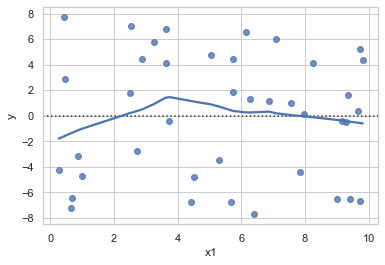

In [21]:

sns.set(style="whitegrid")

#residuals
sns.residplot(data['x1'], data['y'], lowess=True)
plt.show()

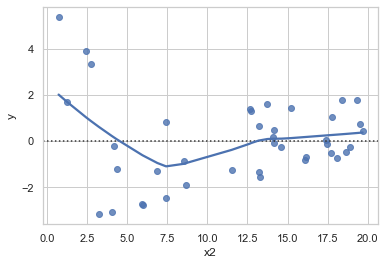

In [22]:
# residuals
sns.residplot(data['x2'], data['y'], lowess=True)
plt.show()